# Experiment `20200418a`

In [35]:

import numpy as np  

import pyUn0 as pyUn0

import pickle

import os

from scipy.signal import hilbert
from scipy import ndimage, signal 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [36]:
def loadPkl(jsonID):
    pkl_file = open("data/20200418a"+str(jsonID)+'.pkl', 'rb')
    data1 = pickle.load(pkl_file)
    pkl_file.close()
    return data1

66


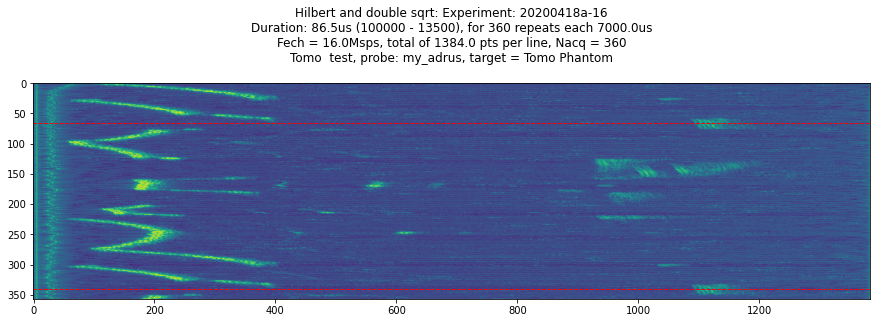

In [251]:
uA = loadPkl(16)

uA.Hilberted  = []
for k in uA.filtered_image:
    uA.Hilberted.append(np.abs(hilbert(k)))
START_POLAR = 340
    
i = 0
MIN = []
for k in uA.filtered_image:
    dist = ((k[1000:1200] - uA.filtered_image[START_POLAR][1000:1200]) ** 2).sum(0)
    if dist == 0:
        dist = 100
    #print(i,dist)
    MIN.append(dist)
    i = i+1
STOP_POLAR = np.argmin(MIN)
#STOP_POLAR=10
print(STOP_POLAR)

RAW = np.sqrt(np.sqrt(np.abs(uA.Hilberted)))
plt.imshow(RAW)
titleExpe = "Hilbert and double sqrt: "+uA.create_title_text()
plt.title(titleExpe) 
plt.axhline(y=START_POLAR,linewidth=1, color='r',ls= 'dashed')
plt.axhline(y=STOP_POLAR,linewidth=1, color='r',ls= 'dashed')
plt.savefig("images/Hilbert_"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")
plt.show()

(274, 1384)


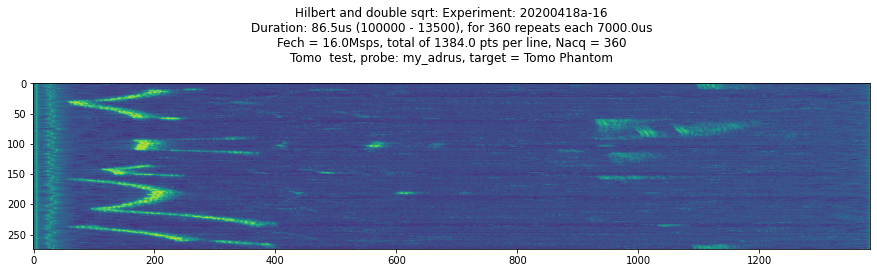

In [252]:
FullImage = RAW[STOP_POLAR:START_POLAR]

print(np.shape(FullImage))
plt.imshow(FullImage)
titleExpe = "Hilbert and double sqrt: "+uA.create_title_text()
plt.title(titleExpe)  
plt.savefig("images/Hilbert_trimmed_"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")
plt.show()

In [253]:
((0.05*2/1450 - 13.5/1E6)*1E6)*16

887.448275862069

(274, 1384)


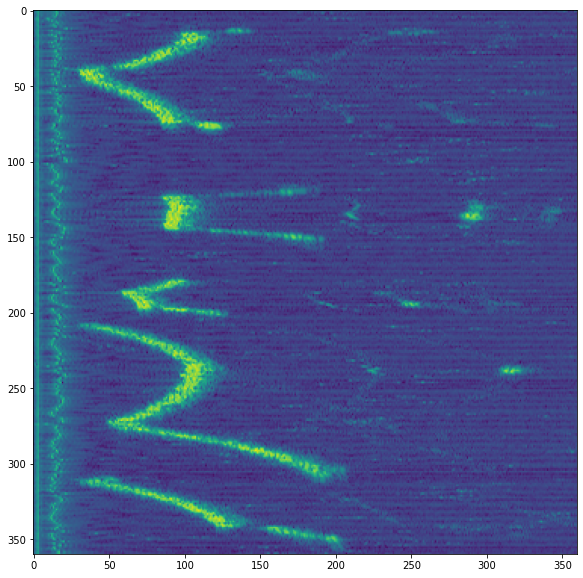

In [255]:
CENTER_POLAR = 700

print(np.shape(FullImage))
CenteredFront  = FullImage[:,:CENTER_POLAR]
factor = 360 / np.shape(CenteredFront)[0] 
ResizedFront = ndimage.zoom(CenteredFront, (1*factor, factor*np.shape(CenteredFront)[0]/np.shape(CenteredFront)[1]))
plt.imshow(ResizedFront)

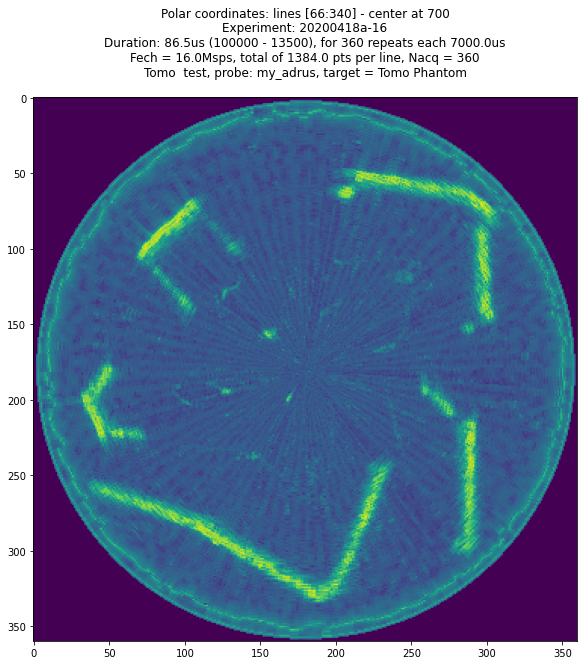

In [256]:
Front_Image = cv2.linearPolar(np.flip(ResizedFront), (180, 180), 250/1.4, cv2.WARP_INVERSE_MAP | cv2.WARP_FILL_OUTLIERS)
plt.imshow(Front_Image)
plt.plot(figsize=(15,15))
titleExpe = "Polar coordinates: lines ["+str(STOP_POLAR)+":"+str(START_POLAR)+"] - center at "+str(CENTER_POLAR)+"\n"+uA.create_title_text()
plt.title(titleExpe)  
plt.savefig("images/Polar_"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")

(274, 1384)
(274, 684)


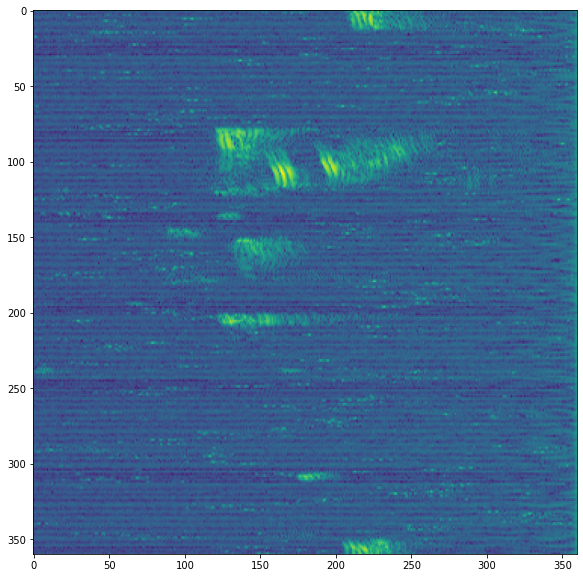

In [257]:
print(np.shape(FullImage))
CenteredBack  = FullImage[:,CENTER_POLAR:CENTER_POLAR+len(CenteredFront[0])]
print(np.shape(CenteredBack))
factor = 360 / np.shape(CenteredBack)[0] 
ResizedBack = ndimage.zoom(CenteredBack, (1*factor, factor*np.shape(CenteredBack)[0]/np.shape(CenteredBack)[1]))
plt.imshow(ResizedBack)

In [258]:
FactorPing = np.shape(CenteredBack)[1] / np.shape(CenteredFront)[1] 
FactorPing

0.9771428571428571

Text(0.5, 1.0, 'Polar coordinates: lines [66:340] - center at 700\nExperiment: 20200418a-16\nDuration: 86.5us (100000 - 13500), for 360 repeats each 7000.0us\nFech = 16.0Msps, total of 1384.0 pts per line, Nacq = 360\nTomo  test, probe: my_adrus, target = Tomo Phantom\n')

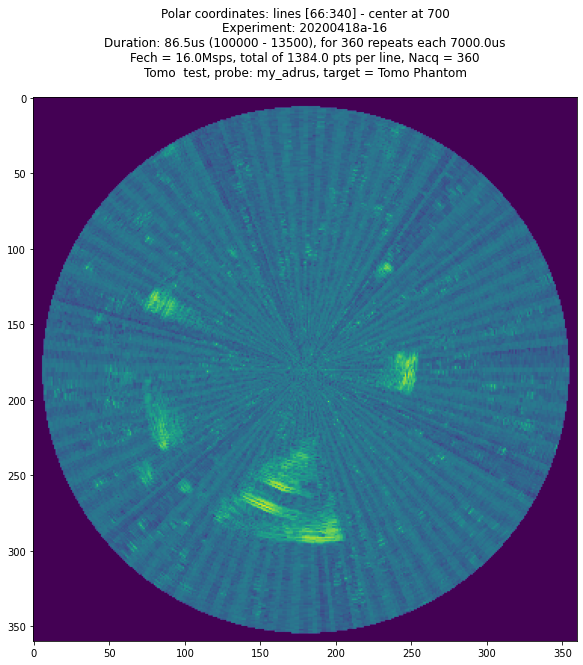

In [259]:
Back_Image = cv2.linearPolar(np.fliplr(ResizedBack), (180, 180), 250/1.4*FactorPing, cv2.WARP_INVERSE_MAP | cv2.WARP_FILL_OUTLIERS)
plt.imshow(Back_Image)
plt.plot(figsize=(15,15))
titleExpe = "Polar coordinates: lines ["+str(STOP_POLAR)+":"+str(START_POLAR)+"] - center at "+str(CENTER_POLAR)+"\n"+uA.create_title_text()
plt.title(titleExpe)  
#plt.savefig("images/Polar_"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")

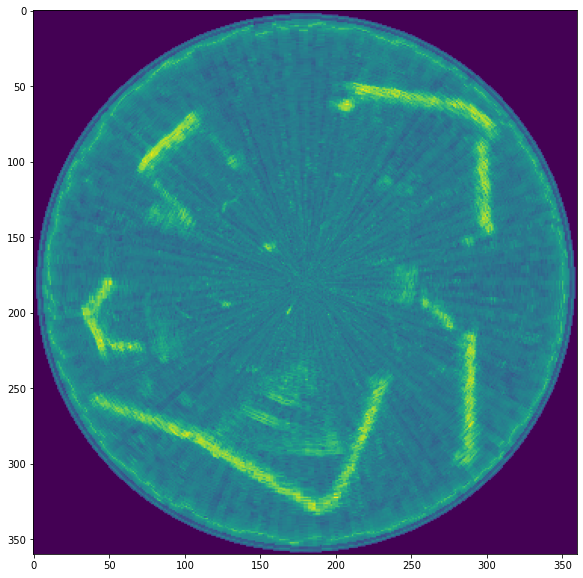

In [260]:
plt.imshow(Back_Image+Front_Image)